# 1.蒙特卡洛方法计算积分
### 代码：

In [1]:
import numpy as np
h=lambda x,y:1/(1+x**2+y**2)
N=[100,1000,10000]
for n in N:
    X=np.random.normal(0,1,(n,2))
    I=0
    for i,j in X:
        I=I+h(i,j)
    I=I/n
    print("n={}时利用蒙特卡罗方法计算积分为:{}".format(n,I))

n=100时利用蒙特卡罗方法计算积分为:0.43736209970958123
n=1000时利用蒙特卡罗方法计算积分为:0.47176476579235316
n=10000时利用蒙特卡罗方法计算积分为:0.4618842891426888


# 2.积分方程求解
### 代码：

n=4时条件数为18333.871519108805


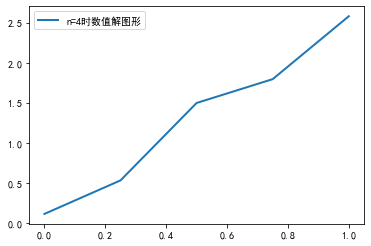

n=8时条件数为532486552.6089228


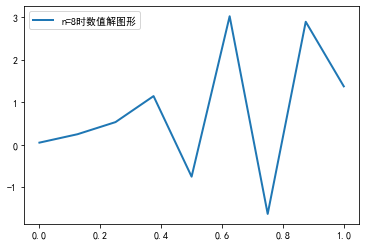

n=16时条件数为7.471053078916171e+16


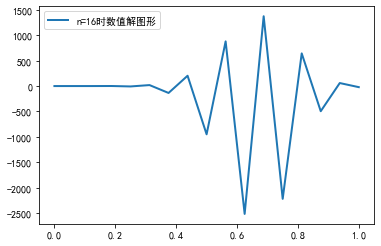

n=32时条件数为4.0698422919895206e+17


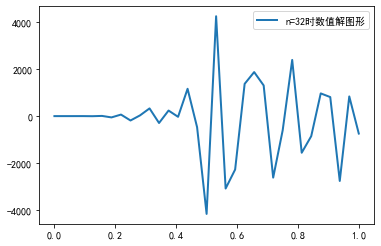

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
from scipy.integrate import simps

for n in [4,8,16,32]:
    X=np.linspace(0,1,n+1)
    h=1/(n+1)
    A=np.zeros((n+1,n+1))
    Y=np.zeros(n+1)
    for i in range(n+1):
        Y[i]=((X[i]**2+1)**1.5-X[i]**3)/3
        A[i][0]=(X[i]**2+X[0]**2)**0.5*h/6
        A[i][n]=(X[i]**2+X[n]**2)**0.5*h/6
        for j in np.arange(2,n,2):
            A[i][j]=(X[i]**2+X[j]**2)**0.5*h/6*2
        for j in np.arange(1,n,2):
            A[i][j]=(X[i]**2+X[j]**2)**0.5*h/6*4
    U= np.linalg.solve(A,Y)
    r=np.linalg.cond(A)
    print("n={}时条件数为{}".format(n,r))
    plt.figure()
    plt.plot(X,U,label="n={}时数值解图形".format(n),linewidth=2)
    plt.legend()
    plt.show()
    

当n过大的时候，A的条件数过大，使得方程数值解误差很大(n越大，A的条件数越大)

# 3.高位积分的蒙特卡洛法
### 代码：

In [3]:
import numpy as np
N=100000
X=np.random.uniform(-1,1,N)
Y=np.random.uniform(-1,1,N)
Z=np.random.uniform(0,2,N)
n=0
for i in range(N):
    if Z[i]>1:
        if(X[i]**2+Y[i]**2+(Z[i]-1)**2<=1):
            n=n+1
    else:
        if(Z[i]**2>=X[i]**2+Y[i]**2):
            n=n+1
p=n/N*8
print("冰淇淋的体积为{}".format(p))

冰淇淋的体积为3.1372
